In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [2]:
ROWS = 12
COLS = 12
MAX_COST = 9
PAUSE = 0.6


In [3]:
# --- OPTION 2: USE YOUR CSV (UNCOMMENT THIS) ---
df = pd.read_csv(
    r'C:\Users\think\OneDrive\Plocha\tabbb.csv',
    sep=';'
)

# convert table values (NOT columns) to float or int
df = df.apply(pd.to_numeric, errors='coerce')

# OPTIONAL: if you really want integers
# df = df.round().astype(int)

cost_grid = df.values

ROWS, COLS = cost_grid.shape



In [4]:
# =========================
# MODEL STATE
# =========================
covered = np.zeros((ROWS, COLS), dtype=int)   # 0 = not colored, 1 = colored
centers = np.zeros((ROWS, COLS), dtype=int)   # picked cost cells
total_cost = 0

# =========================
# 3x3 NEIGHBORS
# =========================
def neighbors_3x3(r, c):
    for dr in [-1, 0, 1]:
        for dc in [-1, 0, 1]:
            rr, cc = r + dr, c + dc
            if 0 <= rr < ROWS and 0 <= cc < COLS:
                yield rr, cc




In [5]:
def pick_best_cell(costs, covered):
    best_score = -1
    best_cell = None

    for r in range(ROWS):
        for c in range(COLS):

            # how many NEW cells would this 3x3 cover?
            new_cells = 0
            for rr, cc in neighbors_3x3(r, c):
                if covered[rr, cc] == 0:
                    new_cells += 1

            if new_cells == 0:
                continue

            # ML-style reward / cost
            score = new_cells / costs[r, c]

            if score > best_score:
                best_score = score
                best_cell = (r, c)

    return best_cell

In [6]:

def draw_table(costs, covered, centers, step, total_cost):
    img = np.ones((ROWS, COLS, 3))

    for r in range(ROWS):
        for c in range(COLS):
            if centers[r, c] == 1:
                img[r, c] = [0.6, 0.3, 0.7]   # blue = cost center
            elif covered[r, c] == 1:
                img[r, c] = [0, 1, 1]   # green = covered

    plt.imshow(img)
    plt.title(f"Step {step} | Total cost = {total_cost}")
    plt.axis("off")

    for r in range(ROWS):
        for c in range(COLS):
            plt.text(c, r, costs[r, c],
                     ha="center", va="center", fontsize=8)

    plt.pause(PAUSE)
    plt.clf()


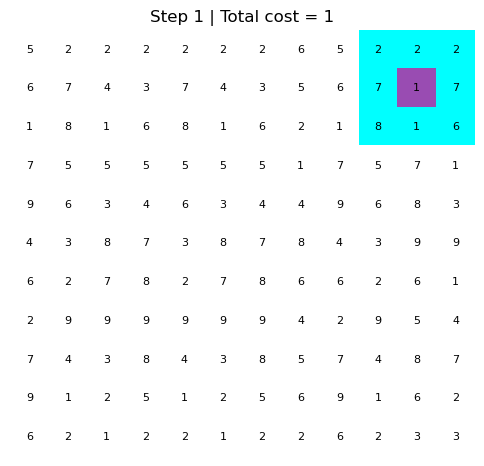

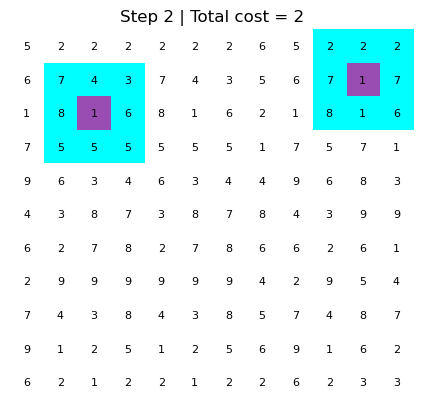

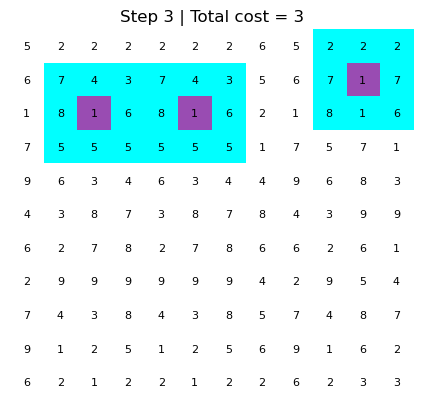

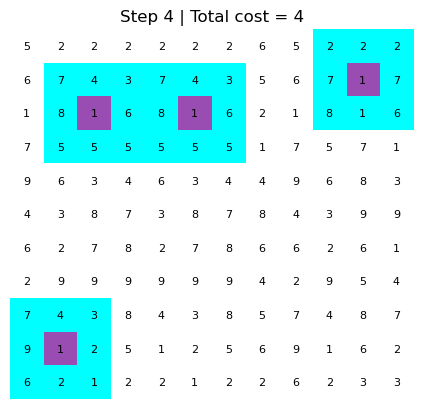

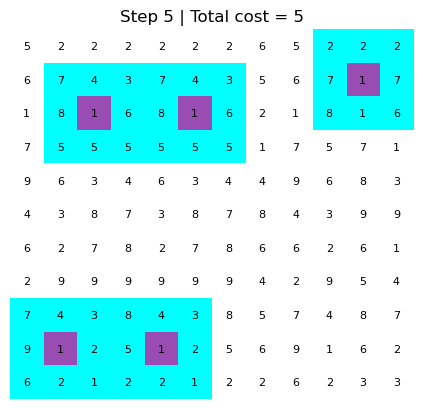

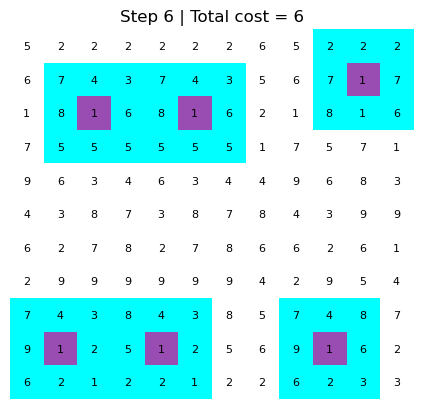

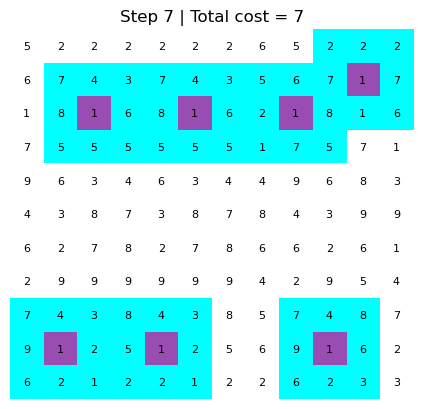

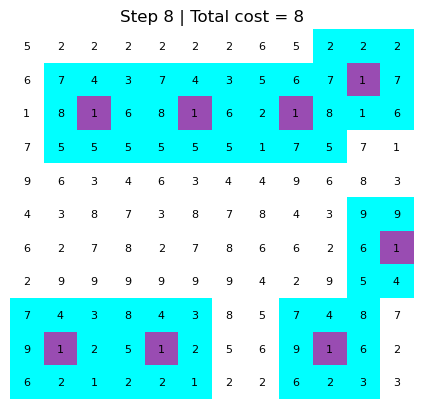

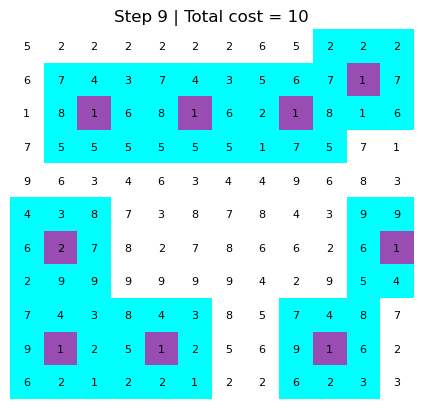

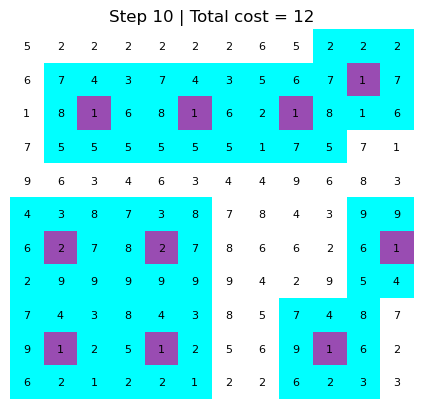

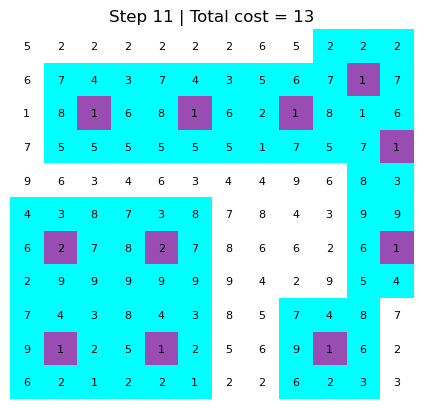

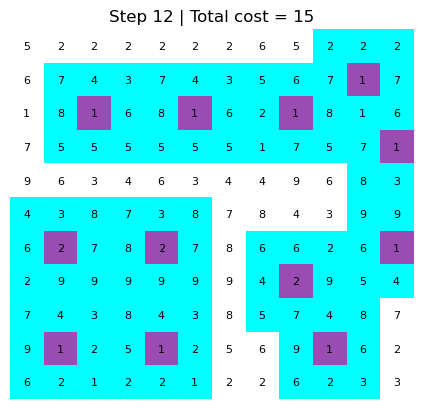

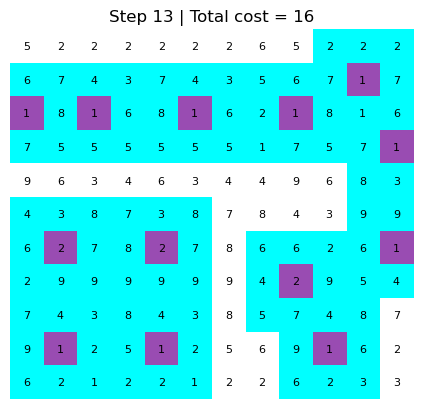

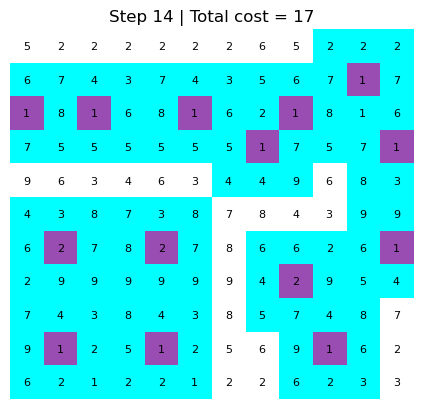

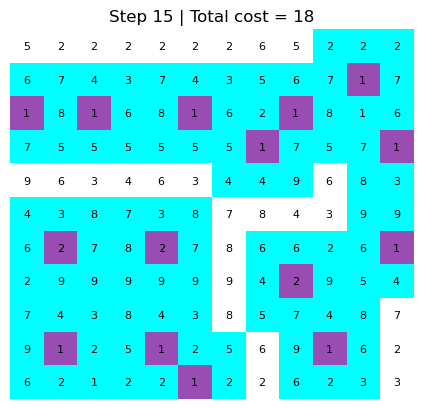

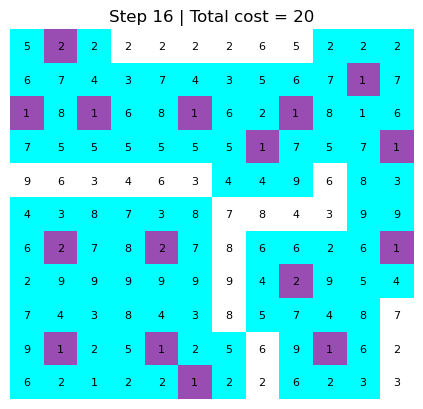

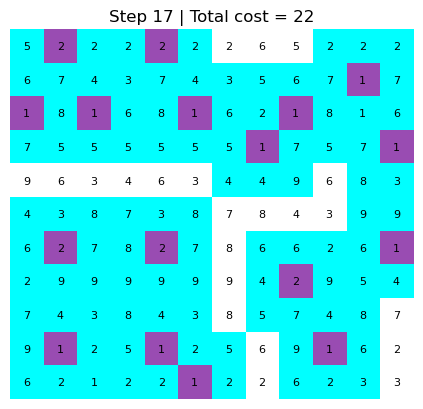

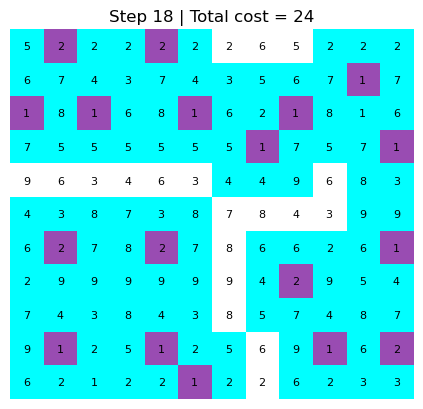

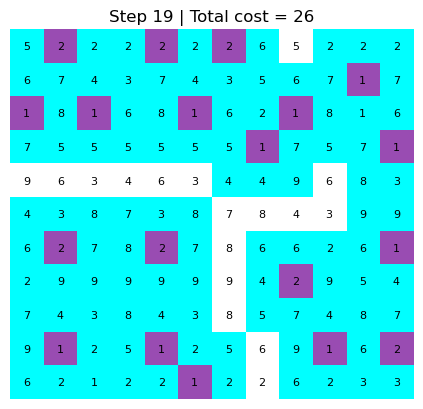

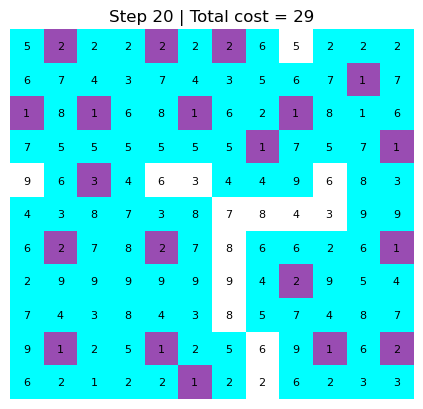

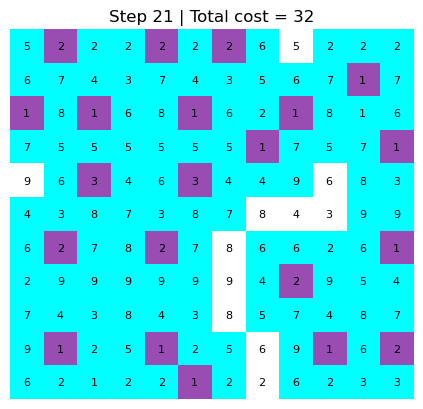

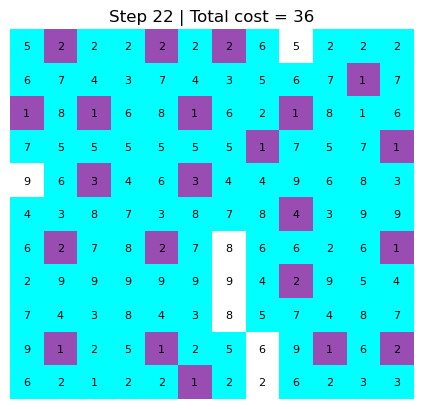

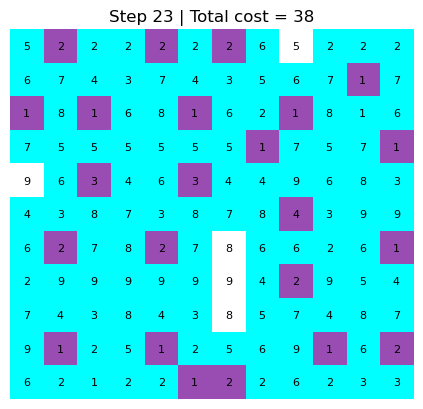

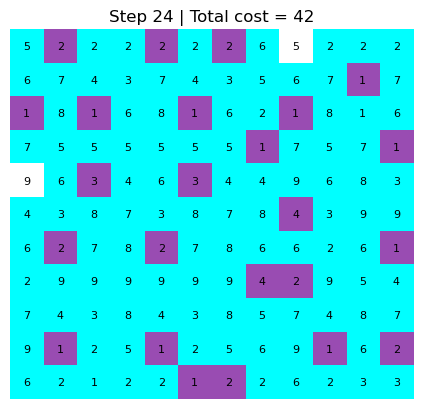

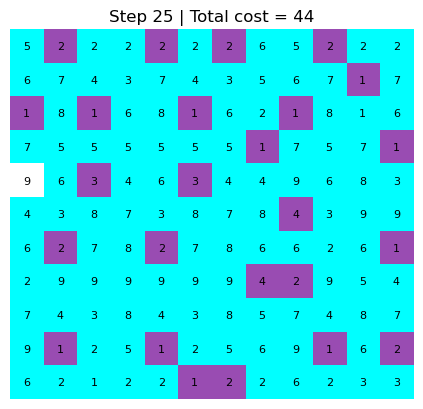

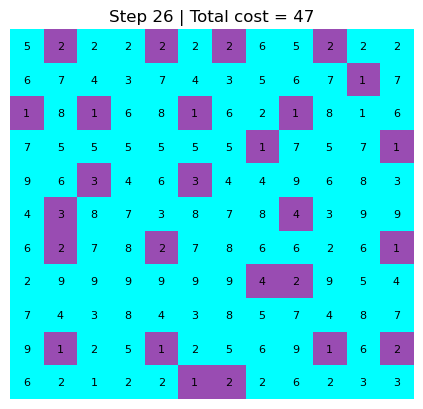

DONE
Final total cost: 47


In [7]:

plt.figure(figsize=(6, 6))
step = 0

while np.any(covered == 0):
    step += 1

    # model decision
    r, c = pick_best_cell(cost_grid, covered)

    # pay cost
    total_cost += cost_grid[r, c]
    centers[r, c] = 1

    # color 3x3 area
    for rr, cc in neighbors_3x3(r, c):
        covered[rr, cc] = 1

    # draw table after each action
    draw_table(cost_grid, covered, centers, step, total_cost)

plt.close()
print("DONE")
print("Final total cost:", total_cost)
